In [1]:
# This is a macro aimed to qualify some questions from the NOvA CEWG talk: https://indico.fnal.gov/event/48063/
# The main concern is to show that the relevant number of degrees of freedom to consider in a chi2 formed via
# chi2 = (x - mu)(cov^-1)(x - mu)
# In order to calculate a naive p-value is the number of bins in x or mu or equivilently the number of diagonal elements of cov.
# This seems to run contrary to what is written in slide 23 and is likely the source of the confusion in the questions.

# This macro takes an example expectation + covariance and samples an ensemble of toys from the corresponding PDF
# A chi2 is calculated from each toy using the same covaraince that was used to generate the toys
# It is shown that the distribution of these chi2 is chi2 distributed with NDoF = NBins (or N diag elements)

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chi2

In [2]:
# First let's create some mock expectation values for some process. This could be e.g. a generator prediction for some xsec

mu = [ 10, 11, 12, 13, 14]

In [3]:
# Now the uncertainty on that expectation is stored in a covaraince matrix. 
# Here we'll just make one up (but provided this is a valid covaraince, the main point of this macro doesn't change)

cov = np.array([[5,4,3,2,1], [4,5,4,3,2], [3,4,5,4,3], [2,3,4,5,4], [1,2,3,4,5]])
cov

array([[5, 4, 3, 2, 1],
       [4, 5, 4, 3, 2],
       [3, 4, 5, 4, 3],
       [2, 3, 4, 5, 4],
       [1, 2, 3, 4, 5]])

In [4]:
# A covaraince matrix is just a parameterisation of the spread of a multi varaite Gaussian distribution around some mean.
# We can sample 10k toys from the corresponding PDF encoded in the covaraince and the expectation values above.
# This ensemble of these toys maps out this PDF.
# If I was to build a covaraince from these toys, it would be identical (within numerical precision) to the input covariance above.

rng = np.random.default_rng()
toys = rng.multivariate_normal(mu, cov, size=10000)
toys

array([[15.26881345, 17.40410795, 17.42055074, 17.08975671, 16.39900906],
       [12.60834362, 10.34157638, 11.53823133, 14.27809928, 14.64333432],
       [ 9.65903486, 10.67423623, 12.34876846, 11.77752479, 13.16011953],
       ...,
       [13.55952516, 10.14181454, 11.21885392, 12.67191263, 13.15252116],
       [ 7.67551343,  9.1819053 , 10.24173206, 11.81459997, 13.71228361],
       [ 7.38426062, 10.37294751, 12.25796753, 13.11745069, 15.10325025]])

In [5]:
# Now for each toy we want to calculate the chi2 using the covaraince. 
# I.e. chi2 = (toy - expectation)(cov^-1)(toy - expectation)
# To avoid confusion with the actual chi2 from a chi2 distribution, we'll call this test statisitc d (for distance)

d = (toys - mu)[:,np.newaxis,:] @ np.linalg.inv(cov) @ (toys - mu)[:,:,np.newaxis]
d = d.flatten()

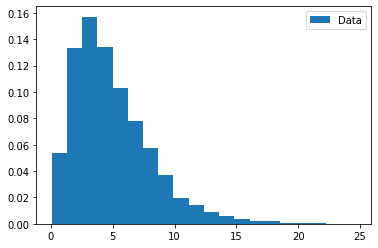

In [6]:
# Plotting the distibution of this "d" variable

plt.hist(d, density=True, bins=20, label="Data")
plt.legend()

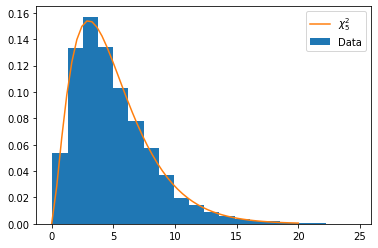

In [7]:
# Now we compare it to a chi2 distribution with 5 DoF (i.e. number of bins or number of diagonal elements of the covariance)

plt.hist(d, density=True, bins=20, label="Data")
x = np.linspace(0, 20, 50)
y = chi2.pdf(x, df=5)
plt.plot(x, y, label="$\chi^2_5$")
plt.legend()

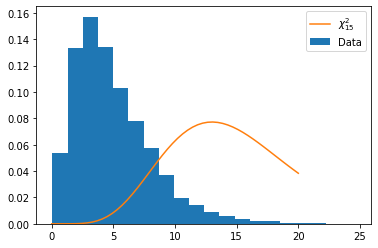

In [8]:
# It looks exactly like a chi2 with 5 NDoF. 
# If, as is on slide 23, we compare a chi2 with NDoF = N diag elements + (N off-diag elements)/2 = 15: 

plt.hist(d, density=True, bins=20, label="Data")
x = np.linspace(0, 20, 50)
y = chi2.pdf(x, df=15)
plt.plot(x, y, label="$\chi^2_{15}$")
plt.legend()

In [9]:
# They don't look the same. 